In [1]:
import  pickle
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
#El enfoque es la diferencia entre RB y R, RB es abierta binario, R es un archivo de texto abierto
data=pd.read_pickle(r'uke_eggedal_data_challenge.pkl')
#data = np.array(data)


In [2]:
data.keys()

dict_keys(['flow', 'obs_tas', 'flow_dates', 'obs_lon_lat', 'obs_pr', 'obs_dates'])

In [3]:
for k in data.keys():
    print(k)
    print(type(data[k]))
    print(np.array(data[k]).shape)

flow
<class 'numpy.ndarray'>
(21542,)
obs_tas
<class 'numpy.ndarray'>
(21546, 9)
flow_dates
<class 'pandas.core.series.Series'>
(21542,)
obs_lon_lat
<class 'list'>
(2,)
obs_pr
<class 'numpy.ndarray'>
(21546, 9)
obs_dates
<class 'pandas.core.series.Series'>
(21546,)


In [4]:
#formato de los datos en temperaturas
pd.DataFrame(data["obs_tas"])

,0,1,2,3,4,5,6,7,8
0,-10.600000,-9.7,-6.7,-8.800000,-8.900000,-7.500000,-8.1,-6.5,-5.4
1,-20.500000,-19.1,-12.0,-17.700001,-17.700001,-13.100000,-15.5,-11.8,-9.1
2,-23.600000,-22.5,-15.1,-21.400000,-21.400000,-16.299999,-19.4,-14.6,-12.2
3,-16.200001,-16.0,-14.1,-15.600000,-15.400000,-14.500000,-15.0,-13.8,-11.9
4,-7.900000,-7.8,-9.5,-7.600000,-7.500000,-8.000000,-7.4,-8.6,-8.2
...,...,...,...,...,...,...,...,...,...
21541,-12.500000,-11.7,-8.6,-11.000000,-10.900000,-9.200000,-9.7,-8.4,-7.5
21542,-12.500000,-11.9,-9.1,-11.400000,-11.200000,-9.800000,-10.6,-8.6,-7.5
21543,-11.900000,-11.4,-8.4,-10.800000,-10.800000,-8.600000,-9.3,-7.2,-6.3
21544,-7.000000,-6.5,-3.4,-5.900000,-6.100000,-4.800000,-5.0,-3.8,-3.0


In [5]:
# asigno cada columna a una variable para crear tablas

flow = pd.DataFrame(data['flow']) # flujo (m3 / sec) - one location - 21542 rows
obs_tas = pd.DataFrame(data['obs_tas']) # Temperature (deg C) – 9 locations - 21546 rows
flow_dates = pd.DataFrame(data['flow_dates']) # dates - 21542 rows
obs_lon_lat = pd.DataFrame(data['obs_lon_lat']) # lon and lat- one location - 2 rows
obs_pr = pd.DataFrame(data['obs_pr']) # Precipitation (mm) - 9 locations - 21546 rows
obs_dates = pd.DataFrame(data['obs_dates']) # dates - 21546 rows

Podemos ver que la variable *flow* esta directamente relacionada con la variable *flow_dates* debido a que tienen el mismo número de filas, y las variables *obs_tas*, *obs_pr* y *obs_dates* estan tambien relacionadas por tener el mismo número de filas.

Lo primero que haremos es analizar por tablas hechas de acuerdo a las relaciones que encontramos.

In [6]:
##### Creamos una tabla del Flow

# eliminamos el indice de fecha para concatenar con el flujo
flow_dates=flow_dates.reset_index()
flow_dates=flow_dates.drop(['index'], axis=1)
flow_dates=flow_dates.rename(columns={0:1})
# hacemos una sola tabla
data_flow = pd.concat([flow, flow_dates], axis=1)
data_flow = data_flow.rename(columns={0:'flow', 1:'flow_dates'})
data_flow

,flow,flow_dates
0,1.723781,1958-01-04
1,0.960882,1958-01-05
2,0.001000,1958-01-06
3,0.001000,1958-01-07
4,0.316796,1958-01-08
...,...,...
21537,4.843290,2016-12-22
21538,3.756970,2016-12-23
21539,3.556818,2016-12-24
21540,3.402133,2016-12-25


In [7]:
#comprobamos que no haya valores nulos
data_flow.describe()

,flow
count,21542.000000
mean,6.899912
std,9.621918
min,0.000031
25%,1.171874
50%,3.181420
75%,8.560671
max,85.397653


In [8]:
data_flow.notnull().describe()

,flow,flow_dates
count,21542,21542
unique,1,1
top,True,True
freq,21542,21542


In [9]:
data_flow.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21542 entries, 0 to 21541
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   flow        21542 non-null  float64       
 1   flow_dates  21542 non-null  datetime64[ns]
dtypes: datetime64[ns](1), float64(1)
memory usage: 336.7 KB


Text(0.5, 0, 'flow')

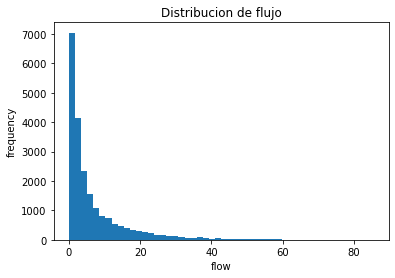

In [10]:
plt.hist(data_flow['flow'], 50)
plt.title('Distribucion de flujo')
plt.ylabel('frequency')
plt.xlabel('flow')

In [11]:
# Creamos una tabla de tempraturas, precipitaciones y sus fechas

# eliminamos el indice de fecha para concatenar las columnas
obs_dates=obs_dates.reset_index()
obs_dates=obs_dates.drop(['index'], axis=1)
obs_dates=obs_dates.rename(columns={0:1})

# cambiamos los nombres de columas con sufijo del lugar
obs_tas=obs_tas.rename(columns={0:'obs_tas_1', 1:'obs_tas_2', 2:'obs_tas_3', 3:'obs_tas_4', 4:'obs_tas_5', 5:'obs_tas_6', 6:'obs_tas_7', 7:'obs_tas_8', 8:'obs_tas_9'})
obs_pr=obs_pr.rename(columns={0:'obs_pr_1', 1:'obs_pr_2', 2:'obs_pr_3', 3:'obs_pr_4', 4:'obs_pr_5', 5:'obs_pr_6', 6:'obs_pr_7', 7:'obs_pr_8', 8:'obs_pr_9'})
obs_dates=obs_dates.rename(columns={1:'obs_dates'})

# concatenamos
data_tas_pr = pd.concat([obs_tas, obs_pr, obs_dates], axis=1)
data_tas_pr

,obs_tas_1,obs_tas_2,obs_tas_3,obs_tas_4,obs_tas_5,obs_tas_6,obs_tas_7,obs_tas_8,obs_tas_9,obs_pr_1,obs_pr_2,obs_pr_3,obs_pr_4,obs_pr_5,obs_pr_6,obs_pr_7,obs_pr_8,obs_pr_9,obs_dates
0,-10.600000,-9.7,-6.7,-8.800000,-8.900000,-7.500000,-8.1,-6.5,-5.4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.1,0.1,1957-01-01
1,-20.500000,-19.1,-12.0,-17.700001,-17.700001,-13.100000,-15.5,-11.8,-9.1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.2,0.1,1957-01-02
2,-23.600000,-22.5,-15.1,-21.400000,-21.400000,-16.299999,-19.4,-14.6,-12.2,0.1,0.0,0.3,0.1,0.3,0.3,0.4,0.3,0.5,1957-01-03
3,-16.200001,-16.0,-14.1,-15.600000,-15.400000,-14.500000,-15.0,-13.8,-11.9,1.0,0.0,1.0,1.1,0.9,0.7,0.8,0.4,0.6,1957-01-04
4,-7.900000,-7.8,-9.5,-7.600000,-7.500000,-8.000000,-7.4,-8.6,-8.2,9.3,8.6,8.0,8.9,8.7,10.2,9.3,10.1,9.7,1957-01-05
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21541,-12.500000,-11.7,-8.6,-11.000000,-10.900000,-9.200000,-9.7,-8.4,-7.5,2.2,0.1,1.1,1.5,0.1,0.0,0.0,0.0,0.0,2015-12-27
21542,-12.500000,-11.9,-9.1,-11.400000,-11.200000,-9.800000,-10.6,-8.6,-7.5,5.5,4.9,8.3,6.1,3.7,5.0,5.4,0.0,5.1,2015-12-28
21543,-11.900000,-11.4,-8.4,-10.800000,-10.800000,-8.600000,-9.3,-7.2,-6.3,1.8,1.7,2.1,2.7,0.2,0.8,2.2,0.0,0.0,2015-12-29
21544,-7.000000,-6.5,-3.4,-5.900000,-6.100000,-4.800000,-5.0,-3.8,-3.0,4.1,3.5,4.6,5.1,3.5,3.4,3.2,0.0,3.6,2015-12-30


In [12]:
#comprobamos que no haya valores nulos
data_tas_pr.describe()

,obs_tas_1,obs_tas_2,obs_tas_3,obs_tas_4,obs_tas_5,obs_tas_6,obs_tas_7,obs_tas_8,obs_tas_9,obs_pr_1,obs_pr_2,obs_pr_3,obs_pr_4,obs_pr_5,obs_pr_6,obs_pr_7,obs_pr_8,obs_pr_9
count,21546.000000,21546.000000,21546.000000,21546.000000,21546.000000,21546.000000,21546.000000,21546.000000,21546.000000,21546.000000,21546.000000,21546.000000,21546.000000,21546.000000,21546.000000,21546.000000,21546.000000,21546.000000
mean,-0.049341,0.711134,2.972459,1.485445,1.271053,2.306071,1.886294,2.834048,3.518686,1.991808,2.006827,2.073629,2.212420,2.265140,2.214713,2.304117,2.383965,2.257083
std,8.257276,8.392313,9.042364,8.565316,8.461657,8.606104,8.567973,8.788865,8.951342,4.026747,4.349912,4.496016,4.563929,4.757687,4.906254,4.804654,5.414730,5.178496
min,-33.799999,-32.599998,-33.299999,-33.700001,-32.799999,-32.200001,-33.200001,-32.599998,-30.799999,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,-5.800000,-5.200000,-3.100000,-4.400000,-4.600000,-3.700000,-4.000000,-3.200000,-2.600000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.200000,0.900000,3.400000,1.800000,1.500000,2.500000,2.200000,3.100000,3.700000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,6.600000,7.600000,10.500000,8.500000,8.200000,9.500000,9.000000,10.200000,11.100000,2.500000,2.200000,2.175000,2.600000,2.600000,2.200000,2.600000,2.200000,2.000000
max,20.299999,21.200001,23.400000,21.700001,21.700001,22.700001,21.799999,23.299999,24.000000,61.500000,60.700001,66.800003,64.000000,62.400002,61.299999,64.500000,67.699997,73.699997


In [13]:
data_tas_pr.notnull().describe()

,obs_tas_1,obs_tas_2,obs_tas_3,obs_tas_4,obs_tas_5,obs_tas_6,obs_tas_7,obs_tas_8,obs_tas_9,obs_pr_1,obs_pr_2,obs_pr_3,obs_pr_4,obs_pr_5,obs_pr_6,obs_pr_7,obs_pr_8,obs_pr_9,obs_dates
count,21546,21546,21546,21546,21546,21546,21546,21546,21546,21546,21546,21546,21546,21546,21546,21546,21546,21546,21546
unique,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
top,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True
freq,21546,21546,21546,21546,21546,21546,21546,21546,21546,21546,21546,21546,21546,21546,21546,21546,21546,21546,21546


In [14]:
data_tas_pr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21546 entries, 0 to 21545
Data columns (total 19 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   obs_tas_1  21546 non-null  float64       
 1   obs_tas_2  21546 non-null  float64       
 2   obs_tas_3  21546 non-null  float64       
 3   obs_tas_4  21546 non-null  float64       
 4   obs_tas_5  21546 non-null  float64       
 5   obs_tas_6  21546 non-null  float64       
 6   obs_tas_7  21546 non-null  float64       
 7   obs_tas_8  21546 non-null  float64       
 8   obs_tas_9  21546 non-null  float64       
 9   obs_pr_1   21546 non-null  float64       
 10  obs_pr_2   21546 non-null  float64       
 11  obs_pr_3   21546 non-null  float64       
 12  obs_pr_4   21546 non-null  float64       
 13  obs_pr_5   21546 non-null  float64       
 14  obs_pr_6   21546 non-null  float64       
 15  obs_pr_7   21546 non-null  float64       
 16  obs_pr_8   21546 non-null  float64      

array([[<AxesSubplot:title={'center':'obs_tas_1'}>,
        <AxesSubplot:title={'center':'obs_tas_2'}>,
        <AxesSubplot:title={'center':'obs_tas_3'}>,
        <AxesSubplot:title={'center':'obs_tas_4'}>],
       [<AxesSubplot:title={'center':'obs_tas_5'}>,
        <AxesSubplot:title={'center':'obs_tas_6'}>,
        <AxesSubplot:title={'center':'obs_tas_7'}>,
        <AxesSubplot:title={'center':'obs_tas_8'}>],
       [<AxesSubplot:title={'center':'obs_tas_9'}>,
        <AxesSubplot:title={'center':'obs_pr_1'}>,
        <AxesSubplot:title={'center':'obs_pr_2'}>,
        <AxesSubplot:title={'center':'obs_pr_3'}>],
       [<AxesSubplot:title={'center':'obs_pr_4'}>,
        <AxesSubplot:title={'center':'obs_pr_5'}>,
        <AxesSubplot:title={'center':'obs_pr_6'}>,
        <AxesSubplot:title={'center':'obs_pr_7'}>],
       [<AxesSubplot:title={'center':'obs_pr_8'}>,
        <AxesSubplot:title={'center':'obs_pr_9'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

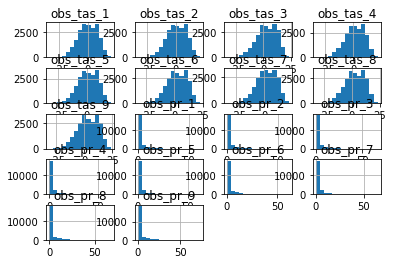

In [15]:
data_tas_pr.hist(bins=15)

### Analisis Exploratorio

Tenemos **21542** registros de datos acerca de **flujo en una sola ubicación con sus fechas**, cabe mencionar que las fechas van desde *1958-01-04* al *2016-12-26*. Mientras que, por otro lado, tenemos **21546** registros de datos acerca de las **temperaturas, precipitaciones y sus respectivas fechas en nueve ubicaciones**, en este caso las fechas empiezan el *1957-01-01* y terminan el *2015-12-31*.

Además, no hemos encontramos valores nulos, y vemos que los datos de flujo siguen una distribucion asimetrica positiva, sin outliers que sean evidentes, lo mismo sucede con los datos de precipitaciones, mientras que las temperaturaturas siguen una distribución normal entre -34 y 24 grados centigrados, con una media entre -1 y 4 grados.

Antes de continuar con el analisis exploratorio, es necesario unificar los datos de flujo y los datos de temperaturas para encontrar las posibles correlaciones, para ello, debemos separar aquellos datos que por fecha no se pueden enlazar.

In [16]:
new_data_flow=data_flow.loc[:21180] # agrupamos solo datos de nuestro interes
new_data_flow=new_data_flow.reset_index() # reseteamos index
new_data_flow=new_data_flow.drop(['index'], axis=1) # eliminamos la columna index
new_data_flow=new_data_flow.drop_duplicates() # eliminamos posibles valores duplicados
new_data_flow

,flow,flow_dates
0,1.723781,1958-01-04
1,0.960882,1958-01-05
2,0.001000,1958-01-06
3,0.001000,1958-01-07
4,0.316796,1958-01-08
...,...,...
21176,2.177040,2015-12-27
21177,4.876250,2015-12-28
21178,4.998840,2015-12-29
21179,4.428777,2015-12-30


In [17]:
new_data_tas_pr=data_tas_pr.loc[368:] # agrupamos solo datos de nuestro interes
new_data_tas_pr=new_data_tas_pr.reset_index() # reseteamos index
new_data_tas_pr=new_data_tas_pr.drop(['index'], axis=1) # eliminamos la columna index
new_data_tas_pr=new_data_tas_pr.drop_duplicates() # eliminamos posibles valores duplicados
new_data_tas_pr

,obs_tas_1,obs_tas_2,obs_tas_3,obs_tas_4,obs_tas_5,obs_tas_6,obs_tas_7,obs_tas_8,obs_tas_9,obs_pr_1,obs_pr_2,obs_pr_3,obs_pr_4,obs_pr_5,obs_pr_6,obs_pr_7,obs_pr_8,obs_pr_9,obs_dates
0,-12.8,-13.000000,-13.0,-12.5,-12.500000,-12.7,-12.000000,-12.5,-12.9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1958-01-04
1,-7.8,-7.900000,-8.4,-7.0,-7.300000,-8.6,-6.500000,-7.7,-8.3,2.0,2.2,3.0,3.3,3.7,0.7,3.1,4.2,1.1,1958-01-05
2,-11.0,-9.900000,-6.5,-8.5,-9.000000,-7.4,-7.900000,-6.8,-5.8,12.7,11.0,16.5,12.5,11.2,12.2,14.1,14.2,10.5,1958-01-06
3,-13.2,-12.200000,-7.9,-10.7,-11.300000,-9.8,-10.100000,-8.5,-7.4,6.6,6.9,9.6,7.3,6.5,5.2,10.4,5.7,3.7,1958-01-07
4,-19.9,-19.299999,-15.4,-18.4,-18.700001,-16.9,-17.700001,-15.9,-14.9,3.4,3.6,2.7,3.5,3.8,3.3,2.9,4.0,3.5,1958-01-08
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21173,-12.5,-11.700000,-8.6,-11.0,-10.900000,-9.2,-9.700000,-8.4,-7.5,2.2,0.1,1.1,1.5,0.1,0.0,0.0,0.0,0.0,2015-12-27
21174,-12.5,-11.900000,-9.1,-11.4,-11.200000,-9.8,-10.600000,-8.6,-7.5,5.5,4.9,8.3,6.1,3.7,5.0,5.4,0.0,5.1,2015-12-28
21175,-11.9,-11.400000,-8.4,-10.8,-10.800000,-8.6,-9.300000,-7.2,-6.3,1.8,1.7,2.1,2.7,0.2,0.8,2.2,0.0,0.0,2015-12-29
21176,-7.0,-6.500000,-3.4,-5.9,-6.100000,-4.8,-5.000000,-3.8,-3.0,4.1,3.5,4.6,5.1,3.5,3.4,3.2,0.0,3.6,2015-12-30


Vemos que no podemos unir los dos dataframes dado que *difieren en el número de registros*, pero como anteriormente eliminamos los posibles valores duplicados, esto significa que **a los datos de temperaturas les hace falta tres registros**, así que debemos averiguar cuales son esos registros para eliminarlos de los datos de flujo y poder concatenar ambos dataframes.

In [18]:
#creamos una copia para eliminar los registros que no se encuentran en el segundo dataframe
flow = new_data_flow
tas_ = new_data_tas_pr

while len(flow['flow_dates']) > len(tas_['obs_dates']):
    
    iteraciones = len(tas_['obs_dates'])
    for i in range(iteraciones):
        
        if (flow['flow_dates'][i] != tas_['obs_dates'][i]):
            print("La fecha del registro", i, "no está en los datos de temperaturas y precipitaciones.")
            flow=flow.drop(i,axis=0)
            flow=flow.reset_index() # reseteamos index
            flow=flow.drop(['index'], axis=1) # eliminamos la columna index
            break

La fecha del registro 8777 no está en los datos de temperaturas y precipitaciones.
La fecha del registro 9495 no está en los datos de temperaturas y precipitaciones.
La fecha del registro 10723 no está en los datos de temperaturas y precipitaciones.


In [19]:
print(flow.shape)
print(tas_.shape)

(21178, 2)
(21178, 19)


In [20]:
# unimos los registros de interes
tas_.insert(0, 'flow', flow['flow'],allow_duplicates=False)
full_data=tas_
full_data

,flow,obs_tas_1,obs_tas_2,obs_tas_3,obs_tas_4,obs_tas_5,obs_tas_6,obs_tas_7,obs_tas_8,obs_tas_9,obs_pr_1,obs_pr_2,obs_pr_3,obs_pr_4,obs_pr_5,obs_pr_6,obs_pr_7,obs_pr_8,obs_pr_9,obs_dates
0,1.723781,-12.8,-13.000000,-13.0,-12.5,-12.500000,-12.7,-12.000000,-12.5,-12.9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1958-01-04
1,0.960882,-7.8,-7.900000,-8.4,-7.0,-7.300000,-8.6,-6.500000,-7.7,-8.3,2.0,2.2,3.0,3.3,3.7,0.7,3.1,4.2,1.1,1958-01-05
2,0.001000,-11.0,-9.900000,-6.5,-8.5,-9.000000,-7.4,-7.900000,-6.8,-5.8,12.7,11.0,16.5,12.5,11.2,12.2,14.1,14.2,10.5,1958-01-06
3,0.001000,-13.2,-12.200000,-7.9,-10.7,-11.300000,-9.8,-10.100000,-8.5,-7.4,6.6,6.9,9.6,7.3,6.5,5.2,10.4,5.7,3.7,1958-01-07
4,0.316796,-19.9,-19.299999,-15.4,-18.4,-18.700001,-16.9,-17.700001,-15.9,-14.9,3.4,3.6,2.7,3.5,3.8,3.3,2.9,4.0,3.5,1958-01-08
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21173,2.177040,-12.5,-11.700000,-8.6,-11.0,-10.900000,-9.2,-9.700000,-8.4,-7.5,2.2,0.1,1.1,1.5,0.1,0.0,0.0,0.0,0.0,2015-12-27
21174,4.876250,-12.5,-11.900000,-9.1,-11.4,-11.200000,-9.8,-10.600000,-8.6,-7.5,5.5,4.9,8.3,6.1,3.7,5.0,5.4,0.0,5.1,2015-12-28
21175,4.998840,-11.9,-11.400000,-8.4,-10.8,-10.800000,-8.6,-9.300000,-7.2,-6.3,1.8,1.7,2.1,2.7,0.2,0.8,2.2,0.0,0.0,2015-12-29
21176,4.428777,-7.0,-6.500000,-3.4,-5.9,-6.100000,-4.8,-5.000000,-3.8,-3.0,4.1,3.5,4.6,5.1,3.5,3.4,3.2,0.0,3.6,2015-12-30


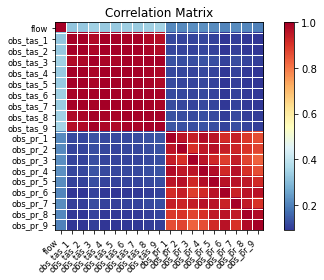

In [22]:
import statsmodels.api as sm

corr = full_data.set_index('obs_dates').corr()
sm.graphics.plot_corr(corr, xnames=list(corr.columns))
plt.show()